In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,GlobalMaxPooling1D,Input

In [2]:
fmnist=tensorflow.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fmnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

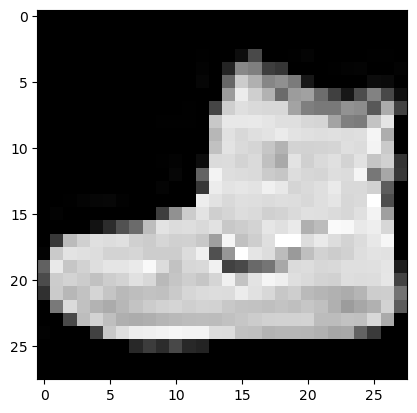

In [7]:
plt.imshow(X_train[0],cmap='gray')

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
X_train,X_test=X_train/255,X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train[0].shape

(28, 28)

In [11]:
K=len(set(y_train))
K

10

In [12]:
i=Input(shape=X_train[0].shape)
x=LSTM(128,return_sequences=True)(i)
x=GlobalMaxPooling1D()(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)  

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 27s 13ms/step - loss: 0.5922 - accuracy: 0.7872 - val_loss: 0.4615 - val_accuracy: 0.8311
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3967 - accuracy: 0.8528 - val_loss: 0.4211 - val_accuracy: 0.8417
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3489 - accuracy: 0.8708 - val_loss: 0.3577 - val_accuracy: 0.8679
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3231 - accuracy: 0.8809 - val_loss: 0.3443 - val_accuracy: 0.8763
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3009 - accuracy: 0.8891 - val_loss: 0.3194 - val_accuracy: 0.8809
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2837 - accuracy: 0.8935 - val_loss: 0.3037 - val_accuracy: 0.8890
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2706 - accuracy: 0.9002 - val_loss: 0.3007 -

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2823 - accuracy: 0.9016


[0.2823092043399811, 0.9016000032424927]

In [15]:
predictions=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


<Axes: >

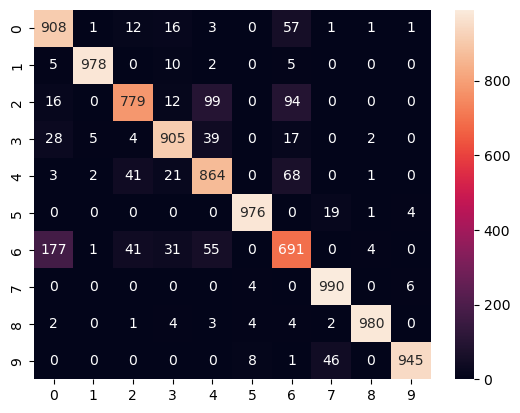

In [16]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=predictions)
sns.heatmap(cm,annot=True,fmt='d')

In [17]:
labels='''
        T-shirt/top
        trouser
        pullover
        dress
        coat
        sandal
        shirt
        sneakers
        bag
        ankle boot'''.split()

true label: dress predicted: coat


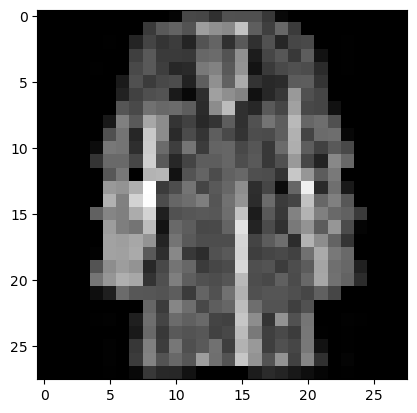

In [19]:
misclassified_idx=np.where(predictions!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
print('true label: %s predicted: %s' % (labels[y_test[i]],labels[predictions[i]]))